In [40]:
# !pip list|grep scipy

In [43]:
import math
import os
import os.path as osp
import json
from datetime import datetime
from pprint import pprint
from matplotlib.pyplot import imread
# from cv2 import imresize
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

In [4]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

### VIST directory

In [47]:
annotations_dir = '/root/xhong/VIST/data/'
images_dir = '/root/xhong/VIST/images'

In [20]:
split = 'test'
# Load dii's split json
b = datetime.now()
path_to_dii_val = osp.join(annotations_dir, 'dii', split+'.description-in-isolation.json')
dii_test = json.load(open(path_to_dii_val))
print ('dii\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

# Load sis's split json
b = datetime.now()
path_to_sis_val = osp.join(annotations_dir, 'sis', split+'.story-in-sequence.json')
sis_test = json.load(open(path_to_sis_val))
print ('sis\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

dii's [test] loaded. It took 0.17 seconds.
sis's [test] loaded. It took 0.39 seconds.


In [21]:
split = 'train'
# Load dii's split json
b = datetime.now()
path_to_dii_val = osp.join(annotations_dir, 'dii', split+'.description-in-isolation.json')
dii_train = json.load(open(path_to_dii_val))
print ('dii\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

# Load sis's split json
b = datetime.now()
path_to_sis_val = osp.join(annotations_dir, 'sis', split+'.story-in-sequence.json')
sis_train = json.load(open(path_to_sis_val))
print ('sis\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))


split = 'val'
# Load dii's split json
b = datetime.now()
path_to_dii_val = osp.join(annotations_dir, 'dii', split+'.description-in-isolation.json')
dii_val = json.load(open(path_to_dii_val))
print ('dii\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

# Load sis's split json
b = datetime.now()
path_to_sis_val = osp.join(annotations_dir, 'sis', split+'.story-in-sequence.json')
sis_val = json.load(open(path_to_sis_val))
print ('sis\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

dii's [train] loaded. It took 2.41 seconds.
sis's [train] loaded. It took 3.05 seconds.
dii's [val] loaded. It took 0.25 seconds.
sis's [val] loaded. It took 0.17 seconds.


In [12]:
# Let's check one ann
sis.keys()

dict_keys(['images', 'info', 'albums', 'type', 'annotations'])

In [13]:
sis['annotations'][0]

[{'original_text': 'The local parish holds a craft show each year.',
  'album_id': '44277',
  'photo_flickr_id': '1741642',
  'setting': 'first-2-pick-and-tell',
  'worker_id': 'FJROI8NWDRIPAM1',
  'story_id': '45530',
  'tier': 'story-in-sequence',
  'worker_arranged_photo_order': 0,
  'text': 'the local parish holds a craft show each year .',
  'storylet_id': '227650'}]

In [14]:
sis['images'][1000]

{'datetaken': '2010-01-22 15:08:10',
 'license': '1',
 'title': 'Pretty Bone Dental Tools',
 'text': '',
 'album_id': '72157623226515173',
 'longitude': '0',
 'url_o': 'https://farm3.staticflickr.com/2743/4330155995_e640e4e498_o.jpg',
 'secret': '1a19fcb9eb',
 'media': 'photo',
 'latitude': '0',
 'id': '4330155995',
 'tags': 'school history philadelphia museum tooth pennsylvania teeth dental medical pa historical philly dentist'}

In [15]:
sis['albums'][3]

{'description': "Photo's from Father's Day 2008 at Tread, Wangaratta",
 'title': "Father's Day 2008",
 'farm': '4',
 'date_update': '1306981520',
 'primary': '2835931462',
 'server': '3010',
 'date_create': '1220783782',
 'photos': '19',
 'secret': 'fa6c97bfe2',
 'owner': '50148267@N00',
 'vist_label': "father's_day",
 'id': '72157607155047588'}

In [49]:
def show_album(alb_id):
    img_ids = alb_to_img_ids[alb_id]
    plt.figure()
    cols = 5
    rows = math.ceil(len(img_ids)/float(cols))
    for i, img_id in enumerate(img_ids):
        img = Images[img_id]
        img_file = osp.join(images_dir, split, img['id']+'.jpg')
        img_content = imread(img_file)
#         img_content = imresize(img_content, (224, 224))
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(img_content)
        ax.axis('off')
        ax.set_title(str(img_id)+'\n'+img['datetaken'][4:])
        #print(img['url_o'])
    plt.show()

In [50]:
def show_story(story_id, show_image=True):
    sent_ids = story_to_sent_ids[story_id]
    if show_image:
        plt.figure()
        for i, sent_id in enumerate(sent_ids):
            img_id = Sents[sent_id]['img_id']
            img = Images[img_id]
            img_file = osp.join(images_dir, split, str(img_id)+'.jpg')
            img_content = imread(img_file)
#             img_content = imresize(img_content, (224, 224))
            ax = plt.subplot(1, len(sent_ids), i+1)
            ax.imshow(img_content)
            ax.axis('off')
            ax.set_title(str(img_id)+'\n'+img['datetaken'][5:])
            #print(img['url_o'])
        plt.show()
    for sent_id in sent_ids:
        sent = Sents[sent_id]
        img_id = sent['img_id']
        img = Images[img_id]
        print ('%s \t %s \n %s' % (img_id, sent['original_text'], img['url_o']))

In [ ]:
def print_story(story_id, Sents, show_image=True):
    sent_ids = story_to_sent_ids[story_id]
    print '\n<story_id=' + story_id + '>'
    for sent_id in sent_ids:
        sent = Sents[sent_id]
        img_id = sent['img_id']
        img = Images[img_id]
        sent_st = '%s \n %s \n' % (img_id, sent['original_text'])
        print sent_st
#         print '%s \n %s \n %s' % (img_id, sent['original_text'], img['url_o'])

In [19]:
def get_stories(story_id, Sents, show_image=True):
    result = ''
    sent_ids = story_to_sent_ids[story_id]
    result += '\nstory_id=' + story_id + '\n'
    for sent_id in sent_ids:
        sent = Sents[sent_id]
        img_id = sent['img_id']
        img = Images[img_id]
        sent_st = '%s \n%s \n' % (img_id, sent['original_text'])
        result += sent_st
    if not is_ascii(result):
        print ('non ascii !')
        return ''
    return result

In [28]:
SPLIT = 'all'

In [29]:
if SPLIT == 'train':
    all_imgs = sis_train['images']
    all_albums = sis_train['albums']
    all_annotations = sis_train['annotations']
elif SPLIT == 'val':
    all_imgs = sis_val['images']
    all_albums = sis_val['albums']
    all_annotations = sis_val['annotations']
elif SPLIT == 'test':
    all_imgs = sis_test['images']
    all_albums = sis_test['albums']
    all_annotations = sis_test['annotations']
else: 
    all_imgs = sis['images'] + sis_train['images'] + sis_val['images']
    all_albums = sis['albums'] + sis_train['albums'] + sis_val['albums']
    all_annotations = sis['annotations'] + sis_train['annotations'] + sis_val['annotations']

In [30]:
Images = {item['id']: item for item in all_imgs}
Albums = {item['id']: item for item in all_albums}

alb_to_img_ids = {}
for item in all_imgs:
    alb_id = item['album_id']
    img_id = item['id']
    alb_to_img_ids[alb_id] = alb_to_img_ids.get(alb_id, []) + [img_id]

# sort img_ids based on datetime
def getDateTime(img_id):
    x = Images[img_id]['datetaken']
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
# for alb_id, img_ids in alb_to_img_ids.items():
#     img_ids.sort(key=getDateTime)

In [31]:
# make sents = [{}]
sents = []
for ann in all_annotations:
    sent = ann[0].copy()
    sent['id'] = sent.pop('storylet_id')
    sent['order'] = sent.pop('worker_arranged_photo_order')
    sent['img_id'] = sent.pop('photo_flickr_id')
    sents += [sent]
Sents = {sent['id']: sent for sent in sents}

# story_id -> sent_ids
story_to_sent_ids = {}
for sent_id, sent in Sents.items():
    story_id = sent['story_id']
    story_to_sent_ids[story_id] = story_to_sent_ids.get(story_id, []) + [sent_id]

def get_order(sent_id):
    return Sents[sent_id]['order']
for story_id, sent_ids in story_to_sent_ids.items():
    sent_ids.sort(key=get_order)
    
# alb_id -> story_ids
alb_to_story_ids = {}
for story_id, sent_ids in story_to_sent_ids.items():
    sent = Sents[sent_ids[0]]
    alb_id = sent['album_id']
    alb_to_story_ids[alb_id] = alb_to_story_ids.get(alb_id, []) + [story_id]

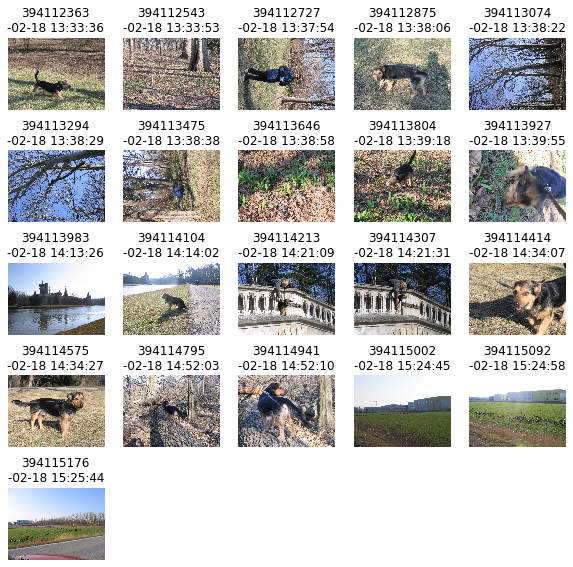

In [56]:
alb_id = '72157594542419706'
show_album(alb_id)

This album has 5 stories.
Story 0


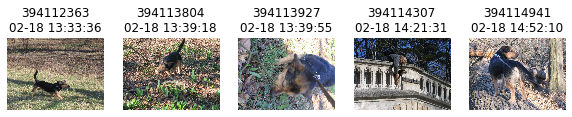

394112363 	 A good day to be a dog. 
 https://farm1.staticflickr.com/147/394112363_5ef0de0fb9_o.jpg
394113804 	 We played in the grass. 
 https://farm1.staticflickr.com/135/394113804_d4833bdcc3_o.jpg
394113927 	 Smelled delicious smells. 
 https://farm1.staticflickr.com/130/394113927_3e915a24e6_o.jpg
394114307 	 Looked through the railings. 
 https://farm1.staticflickr.com/150/394114307_84b62d3c04_o.jpg
394114941 	 And even jumped on some logs. 
 https://farm1.staticflickr.com/124/394114941_ae6d150957_o.jpg
Story 1


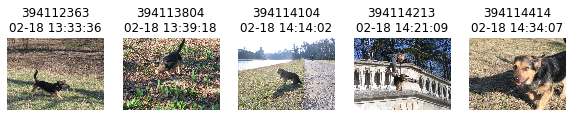

394112363 	 I went for a walk today. 
 https://farm1.staticflickr.com/147/394112363_5ef0de0fb9_o.jpg
394113804 	 I followed my owner to the park. 
 https://farm1.staticflickr.com/135/394113804_d4833bdcc3_o.jpg
394114104 	 I waited while he took many pictures. 
 https://farm1.staticflickr.com/135/394114104_923fb64a02_o.jpg
394114213 	 We stopped to catch the view from the bridge. 
 https://farm1.staticflickr.com/143/394114213_18f756e976_o.jpg
394114414 	 Tired after a long day. 
 https://farm1.staticflickr.com/158/394114414_f2c99dd523_o.jpg
Story 2


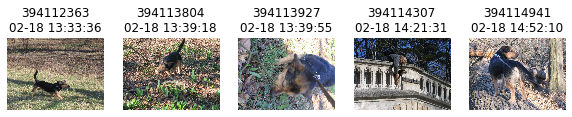

394112363 	 The dog was excited for his daily walk. 
 https://farm1.staticflickr.com/147/394112363_5ef0de0fb9_o.jpg
394113804 	 The dog ran around, exploring the park. 
 https://farm1.staticflickr.com/135/394113804_d4833bdcc3_o.jpg
394113927 	 It sniffed everything it could see. 
 https://farm1.staticflickr.com/130/394113927_3e915a24e6_o.jpg
394114307 	 The dog and its owner stopped to rest on a bridge. 
 https://farm1.staticflickr.com/150/394114307_84b62d3c04_o.jpg
394114941 	 The dog did not want to leave but it was time to go home. 
 https://farm1.staticflickr.com/124/394114941_ae6d150957_o.jpg
Story 3


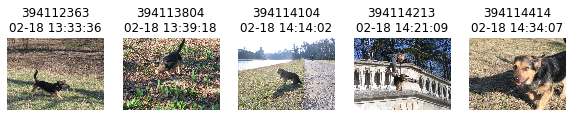

394112363 	 It's time to go for a walk! 
 https://farm1.staticflickr.com/147/394112363_5ef0de0fb9_o.jpg
394113804 	 I'm exploring my new surroundings. 
 https://farm1.staticflickr.com/135/394113804_d4833bdcc3_o.jpg
394114104 	 I'm taking in some fresh air and sunshine. 
 https://farm1.staticflickr.com/135/394114104_923fb64a02_o.jpg
394114213 	 Time to look out over the bridge and survey everything. 
 https://farm1.staticflickr.com/143/394114213_18f756e976_o.jpg
394114414 	 I had so much fun on my walk but now it's time to head home. 
 https://farm1.staticflickr.com/158/394114414_f2c99dd523_o.jpg
Story 4


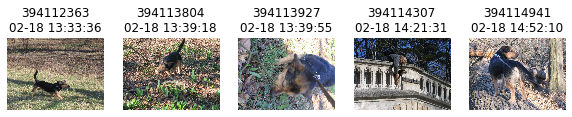

394112363 	 The new puppy just arrived home! 
 https://farm1.staticflickr.com/147/394112363_5ef0de0fb9_o.jpg
394113804 	 He was playing fetch with big sticks and running around. 
 https://farm1.staticflickr.com/135/394113804_d4833bdcc3_o.jpg
394113927 	 He enjoyed sniffing his new yard and going for a walk. 
 https://farm1.staticflickr.com/130/394113927_3e915a24e6_o.jpg
394114307 	 He had no fear when they got to the bridge and decided to look out over the water. 
 https://farm1.staticflickr.com/150/394114307_84b62d3c04_o.jpg
394114941 	 This little guy is going to enjoy his new home. 
 https://farm1.staticflickr.com/124/394114941_ae6d150957_o.jpg


In [53]:
story_ids = alb_to_story_ids[alb_id]
print ('This album has %s stories.' % len(story_ids))
for i in range(5):
    print('Story', i)
    show_story(story_ids[i], True)

In [54]:
len(all_albums)

10040

In [57]:
# num_stories = 0
# num_albums = 0
# num_file = 0
# final_res = ''
# for album in all_albums:
#     album_id = album['id']
#     story_ids = alb_to_story_ids[album_id]
#     final_res += '\nalbum_id=' + album_id
# #     print 'This album has %s stories.' % len(story_ids)
#     for story_id in story_ids:
# #         print('Story', story_id)
#         stories = get_stories(story_id, Sents, False)
#         final_res += stories
#     num_albums += 1
#     if num_albums % 600 == 0:
#         f = open('train_sind'+ str(num_file) +'.txt', 'w')
#         f.write(final_res)
#         final_res = ''
#         f.close()
#         num_file += 1
        
# # ## DEBUG
# #     num_stories += 1
# #     if num_stories > 10:
# #         break


In [42]:
# alb_ids = Albums.keys()
# alb_id = alb_ids[2]; print alb_id
# show_album(alb_id)

In [ ]:
sis['type']

In [ ]:
dii.keys()

In [ ]:
pprint(dii['annotations'][0][0])
pprint(dii['annotations'][5][0])

In [ ]:
sis['annotations'][0][0]

In [ ]:
sis['albums'][0]['id']

In [ ]:
for i in range(len(sis['albums'])):
    if not sis['albums'][i]['id'] == dii['albums'][i]['id']:
        print 'inconsitancy found.'

In [ ]:
sis['albums'][0]

In [ ]:
sis['images'][7]['id']

In [ ]:
sis['annotations'][14]

In [ ]:
dii['annotations'][14]

In [ ]:
for i in range(len(sis['annotations'][:2])):
    sd = sis['annotations'][i][0]
    dd = dii['annotations'][i][0]
    if sd['album_id'] != dd['album_id'] or sd['photo_flickr_id'] != dd['photo_flickr_id']  \
        or sd['worker_arranged_photo_order'] != dd['photo_order_in_story']:
            print 'k'

In [ ]:
import visual_genome.local as vg

In [ ]:
VG_img_dats = vg.get_all_image_data('/Users/tonyhong/ROOT/coli/VisualGenome')

In [ ]:
len(VG_img_dat)

In [ ]:
flickr2VG = dict()
for i, VG_img in enumerate(VG_img_dats):
    flickr2VG[str(VG_img.flickr_id)] = VG_img.id
#     if VG_img.flickr_id:
#     print VG_img.flickr_id
len(VG_flickr_ids)

In [ ]:
VG_ids = set(flickr2VG.keys())
# flickr2VG[2835098587]

In [ ]:
len_sis_test = len(sis['images'])
SIND_test_ids = {img['id'] for img in sis['images']}
SIND_train_ids = {img['id'] for img in sis_train['images']}
SIND_val_ids = {img['id'] for img in sis_val['images']}
print len(SIND_train_ids)
print len(SIND_val_ids)

In [ ]:
flickr2VG.keys()[0]

In [ ]:
joint_set = set()
joint_set.update(VG_ids & SIND_train_ids)
joint_set.update(VG_ids & SIND_test_ids)
joint_set.update(VG_ids & SIND_val_ids)
joint_list = list(joint_set)
len(joint_list)

In [ ]:
flickr2VG['497007959']

In [ ]:
# print len(Images)
story_dict = dict()
for idx in joint_list:
    if Images.get(idx, -1) != -1:
#         print('image_id', idx)
        album_id = Images[idx]['album_id']
#         print('album_id', album_id)
        story_ids = alb_to_story_ids[album_id]
#         print('story_ids', story_ids)
        for story_id in story_ids:
            sent_ids = story_to_sent_ids[story_id]
            for sent_id in sent_ids:
                sent_img_id = Sents[sent_id]['img_id']
                if sent_img_id == idx:
                    story_dict[story_id] = idx
#         print '\n'
        
len(story_dict)

In [ ]:
for it in story_dict.items():
    print it[1]
    show_story(it[0], False)
    print ''
    print ''